# Measure Upload

Let's assume that we want to get a formula for Upload speed quality. This formula should be able to return a number between zero and 100. One hundred means the best and 0 means the worst.

## Create a general formula
First, we create a general formula. Let's assume that zero is the worst, 4 MBps is equal to the threshold and 12 MBps is the ideal.

### imports

In [5]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


### Functions

In [7]:
# Logistic function to fit
def logistic_fit(s, L, k, s_0):
    return L / (1 + np.exp(-k * (s - s_0)))

# Hypothetical dataset for upload speeds
upload_speeds = np.array([0, 1, 2, 3, 4, 6, 8, 10, 12, 14])
upload_percentages = np.array([0, 5, 15, 25, 60, 75, 85, 95, 100, 100])

# Fit the logistic curve to the hypothetical upload data
upload_params, upload_covariance = curve_fit(logistic_fit, upload_speeds, upload_percentages, bounds=(0, [100, 5, 15]))

### Plot

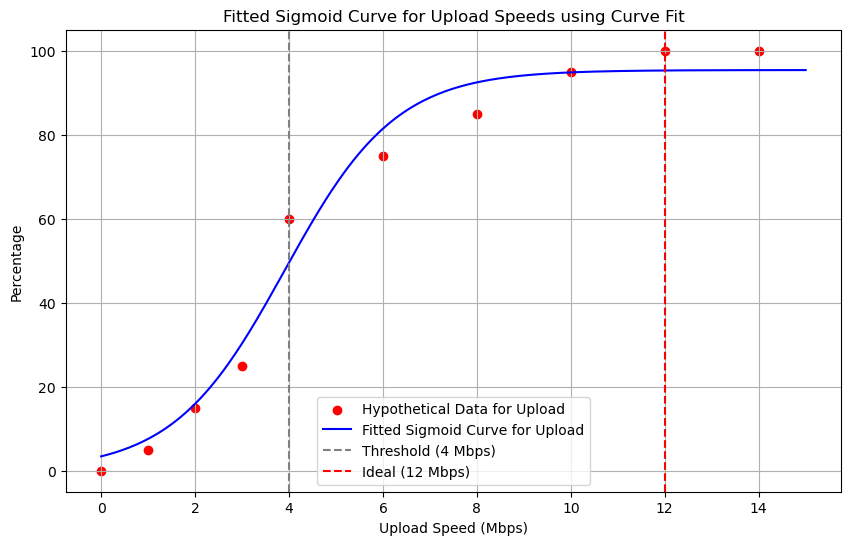

array([95.39878347,  0.84286492,  3.90713974])

In [8]:
# Speed values ranging from 0 to 15 for the plot (for upload speeds)
s_values = np.linspace(0, 15, 300)

# Predict using the fitted logistic function for upload speeds
predicted_upload_percentages_curve_fit = logistic_fit(s_values, *upload_params)

plt.figure(figsize=(10, 6))
plt.scatter(upload_speeds, upload_percentages, color='red', label='Hypothetical Data for Upload')
plt.plot(s_values, predicted_upload_percentages_curve_fit, label='Fitted Sigmoid Curve for Upload', color='blue')
plt.axvline(x=4, color='grey', linestyle='--', label='Threshold (4 Mbps)')
plt.axvline(x=12, color='red', linestyle='--', label='Ideal (12 Mbps)')
plt.title('Fitted Sigmoid Curve for Upload Speeds using Curve Fit')
plt.xlabel('Upload Speed (Mbps)')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)
plt.show()

upload_params

## Create function for formula

In [10]:
def adjusted_calculate_upload_percentage(s, L=95.40, k=0.8429, s_0=3.9071):
    """Calculate the percentage P for a given upload speed s using the adjusted logistic function."""
    return L / (1 + np.exp(-k * (s - s_0)))

# Test the adjusted function for a few values
adjusted_test_upload_percentages = [adjusted_calculate_upload_percentage(s) for s in upload_speeds]

adjusted_test_upload_percentages

[3.4155052671921458,
 7.575685224357679,
 15.925765704500344,
 30.303768333651085,
 49.56663031874154,
 81.44518264975117,
 92.46438169382193,
 94.84205366498895,
 95.29611973243853,
 95.38073429676864]